In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
df2= pd.read_csv('january.csv')
df2

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,25-01-2022 15:08,It is the best music app you can find... But b...,4,2524,NaN
1,26-01-2022 15:01,It gets very annoying and frustrating because ...,3,1141,NaN
2,25-01-2022 14:05,"Very poor experience, every time I just open t...",1,1050,NaN
3,14-01-2022 18:13,Horrible creators. The old interface was amazi...,1,1040,NaN
4,08-01-2022 18:27,Im a fan of spotify but the new update disappo...,1,994,NaN
...,...,...,...,...,...
5226,01-01-2022 08:19,This app has remixes from Music Artist that I'...,5,0,NaN
5227,01-01-2022 05:53,Are you punishing people for downloading your ...,2,0,NaN
5228,01-01-2022 04:41,One day I was able to switch between songs and...,1,0,NaN
5229,01-01-2022 02:13,"Use to be sooo good back when I had it, and wh...",1,0,NaN


In [3]:
df2= df2[['Review','Rating']]
df2['Length']= df2['Review'].apply(len)
df2.head()

<ipython-input-3-c6bdbe9a93c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Length']= df2['Review'].apply(len)


,Review,Rating,Length
0,It is the best music app you can find... But b...,4,381
1,It gets very annoying and frustrating because ...,3,434
2,"Very poor experience, every time I just open t...",1,415
3,Horrible creators. The old interface was amazi...,1,372
4,Im a fan of spotify but the new update disappo...,1,390


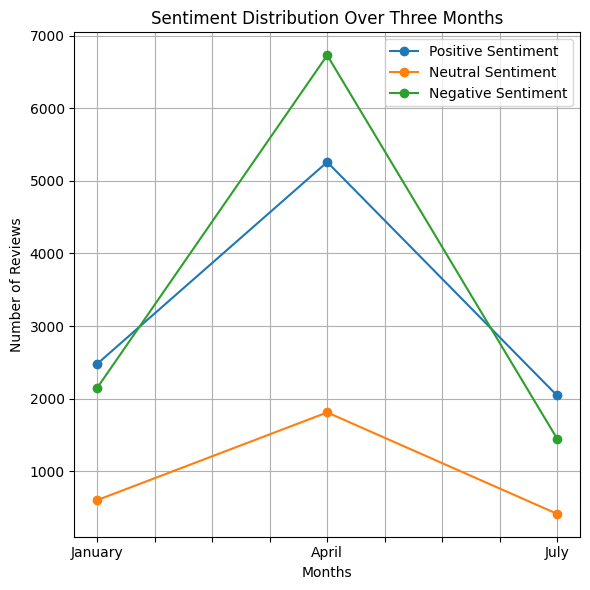

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

months = ['January', 'April', 'July']
positive_sentiment = [2480, 5261, 2042]
neutral_sentiment = [600, 1808, 410]
negative_sentiment = [2151, 6734, 1448]

data = pd.DataFrame({'Months': months,
                     'Positive Sentiment': positive_sentiment,
                     'Neutral Sentiment': neutral_sentiment,
                     'Negative Sentiment': negative_sentiment})

data.set_index('Months', inplace=True)

data.plot(kind='line', marker='o', figsize=(6, 6))

plt.title('Sentiment Distribution Over Three Months')
plt.xlabel('Months')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


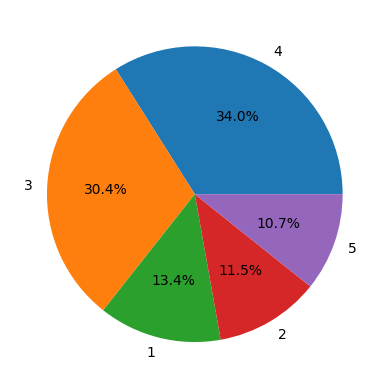

In [5]:
plt.pie(df2['Rating'].value_counts(), labels=df2['Rating'].unique(), autopct='%1.1f%%')
plt.show()

In [4]:
def rating(score):
  if score > 3:
    return 'Positive'
  elif score == 3:
    return 'Neutral'
  else:
    return 'Negative'

### **Data Preprocessing**

In [5]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def cleaning(text):
    # Converting to lowercase and removing punctuations
    text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Removing stopwords
    text_clean = [word for word in text_clean.split() if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(word, 'v') for word in text_clean]
    return ' '.join(sentence)

df2['Review'] = df2['Review'].apply(cleaning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-5-908cdd3c1ec7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Review'] = df2['Review'].apply(cleaning)


In [6]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=5fde22692100b877b036c9cc410d4c6d1bfff11960c1b239565ddd7c4dfd5a6b
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [7]:
!pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 11.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=ad9c832b988154a41f1005e60cc809e3a37626b578c1551ec

In [8]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from afinn import Afinn
from pattern.en import sentiment

nltk.download('vader_lexicon')
nltk.download('sentiwordnet')

def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def afinn_sentiment(text):
    afinn = Afinn()
    return afinn.score(text)

def sentiwordnet_sentiment(text):
    sentiment_scores = []
    for word in text.split():
        synsets = list(swn.senti_synsets(word))
        if synsets:
            sentiment = synsets[0]
            sentiment_scores.append(sentiment.pos_score() - sentiment.neg_score())
    if sentiment_scores:
        return sum(sentiment_scores) / len(sentiment_scores)
    else:
        return 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [9]:
df2['VADER Sentiment'] = df2['Review'].apply(vader_sentiment)
df2['TextBlob Sentiment'] = df2['Review'].apply(textblob_sentiment)
df2['AFINN Sentiment'] = df2['Review'].apply(afinn_sentiment)
df2['SentiWordNet Sentiment'] = df2['Review'].apply(sentiwordnet_sentiment)

<ipython-input-9-ffc095a8efac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VADER Sentiment'] = df2['Review'].apply(vader_sentiment)


Lexicons- Part 1

In [10]:
def map_sentiment(score):
    if score >= 0.04:
        return 5
    elif score > 0 and score < 0.04:
        return 4
    elif score <= -0.04:
        return 1
    elif score < 0 and score > -0.04:
        return 2
    else:
        return 3

In [11]:
def map_afinn_sentiment(score):
    if score > 1:
        return 5
    elif score > 0  and score <= 1:
        return 4
    elif score < -1:
        return 1
    elif score < 0 and score >= -1:
      return 2
    else:
        return 3

In [12]:
#Accuracy for VADER
df2['VADER Sentiment Label'] = df2['VADER Sentiment'].apply(map_sentiment)
vader_accuracy = (df2['VADER Sentiment Label'] == df2['Rating']).mean()*100

#Accuracy for TextBlob
df2['TextBlob Sentiment Label'] = df2['TextBlob Sentiment'].apply(map_sentiment)
textblob_accuracy = (df2['TextBlob Sentiment Label'] == df2['Rating']).mean()*100

#Accuracy for AFINN
df2['AFINN Sentiment Label'] = df2['AFINN Sentiment'].apply(map_afinn_sentiment)
afinn_accuracy = (df2['AFINN Sentiment Label'] == df2['Rating']).mean()*100

#Accuracy for SentiWordNet
df2['SentiWordNet Sentiment Label'] = df2['SentiWordNet Sentiment'].apply(map_sentiment)
sentiwordnet_accuracy = (df2['SentiWordNet Sentiment Label'] == df2['Rating']).mean()*100

print("Accuracy for Vader:", vader_accuracy)
print("Accuracy for TextBlob:", textblob_accuracy)
print("Accuracy for AFINN:", afinn_accuracy)
print("Accuracy for SentiWordNet:", sentiwordnet_accuracy)

Accuracy for Vader: 46.68323456318104
Accuracy for TextBlob: 43.47161154654942
Accuracy for AFINN: 45.67004396864844
Accuracy for SentiWordNet: 35.23226916459568


In [13]:
from sklearn.metrics import confusion_matrix

vader_confusion_matrix = confusion_matrix(df2['Rating'], df2['VADER Sentiment Label'])
textblob_confusion_matrix = confusion_matrix(df2['Rating'], df2['TextBlob Sentiment Label'])
afinn_confusion_matrix = confusion_matrix(df2['Rating'], df2['AFINN Sentiment Label'])
sentiwordnet_confusion_matrix = confusion_matrix(df2['Rating'], df2['SentiWordNet Sentiment Label'])

In [14]:
def calculate_precision(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    precision = true_positives / (true_positives + false_positives)
    return precision

vader_precision = calculate_precision(vader_confusion_matrix)
textblob_precision = calculate_precision(textblob_confusion_matrix)
afinn_precision = calculate_precision(afinn_confusion_matrix)
sentiwordnet_precision = calculate_precision(sentiwordnet_confusion_matrix)

print("Precision for Vader:", vader_precision)
print("Precision for TextBlob:", textblob_precision)
print("Precision for AFINN:", afinn_precision)
print("Precision for SentiWordNet:", sentiwordnet_precision)

Precision for Vader: 0.11538461538461539
Precision for TextBlob: 0.2909090909090909
Precision for AFINN: 0.2831858407079646
Precision for SentiWordNet: 0.24622030237580994


In [15]:
def calculate_recall(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive
    recall = true_positives / (true_positives + false_negatives)
    return recall

vader_recall = calculate_recall(vader_confusion_matrix)
textblob_recall = calculate_recall(textblob_confusion_matrix)
afinn_recall = calculate_recall(afinn_confusion_matrix)
sentiwordnet_recall = calculate_recall(sentiwordnet_confusion_matrix)

print("Recall for Vader:", vader_recall)
print("Recall for TextBlob:", textblob_recall)
print("Recall for AFINN:", afinn_recall)
print("Recall for SentiWordNet:", sentiwordnet_recall)


Recall for Vader: 0.015
Recall for TextBlob: 0.10191082802547771
Recall for AFINN: 0.3004694835680751
Recall for SentiWordNet: 0.6627906976744186


In [16]:
def calculate_f1_score(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Calculate the F1 score using the precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

# Calculate F1 score for VADER sentiment analysis
vader_f1_score = calculate_f1_score(vader_confusion_matrix)

# Calculate F1 score for TextBlob sentiment analysis
textblob_f1_score = calculate_f1_score(textblob_confusion_matrix)

# Calculate F1 score for AFINN sentiment analysis
afinn_f1_score = calculate_f1_score(afinn_confusion_matrix)

# Calculate F1 score for SentiWordNet sentiment analysis
sentiwordnet_f1_score = calculate_f1_score(sentiwordnet_confusion_matrix)

# Print the F1 scores for each sentiment analysis method
print("F1 Score for Vader:", vader_f1_score)
print("F1 Score for TextBlob:", textblob_f1_score)
print("F1 Score for AFINN:", afinn_f1_score)
print("F1 Score for SentiWordNet:", sentiwordnet_f1_score)


F1 Score for Vader: 0.026548672566371685
F1 Score for TextBlob: 0.15094339622641512
F1 Score for AFINN: 0.29157175398633256
F1 Score for SentiWordNet: 0.3590551181102362


Lexicons- Part 2

In [17]:
df2.loc[df2['Rating'] == 4, 'Rating'] = 5
df2.loc[df2['Rating'] == 2, 'Rating'] = 1

In [18]:
def map_sentiment(score):
    if score > 0.04:
        return 5
    elif score > -0.04:
        return 3
    else:
        return 1

def map_afinn_sentiment(score):
    if score > 0.5:
        return 5
    elif score < -0.5:
        return 1
    else:
        return 3

# Mapping sentiment scores to sentiment labels for each lexicon
df2['VADER Sentiment Label'] = df2['VADER Sentiment'].apply(map_sentiment)
df2['TextBlob Sentiment Label'] = df2['TextBlob Sentiment'].apply(map_sentiment)
df2['AFINN Sentiment Label'] = df2['AFINN Sentiment'].apply(map_afinn_sentiment)
df2['SentiWordNet Sentiment Label'] = df2['SentiWordNet Sentiment'].apply(map_sentiment)

#Accuracy for each lexicon
vader_accuracy = (df2['VADER Sentiment Label'] == df2['Rating']).mean() * 100
textblob_accuracy = (df2['TextBlob Sentiment Label'] == df2['Rating']).mean() * 100
afinn_accuracy = (df2['AFINN Sentiment Label'] == df2['Rating']).mean() * 100
sentiwordnet_accuracy = (df2['SentiWordNet Sentiment Label'] == df2['Rating']).mean() * 100

print("Accuracy for VADER:", vader_accuracy)
print("Accuracy for TextBlob:", textblob_accuracy)
print("Accuracy for AFINN:", afinn_accuracy)
print("Accuracy for SentiWordNet:", sentiwordnet_accuracy)


Accuracy for VADER: 62.07226151787422
Accuracy for TextBlob: 57.140126170904225
Accuracy for AFINN: 62.626648824316575
Accuracy for SentiWordNet: 43.45249474287899


In [19]:
from sklearn.metrics import confusion_matrix

vader_confusion_matrix = confusion_matrix(df2['Rating'], df2['VADER Sentiment Label'])
textblob_confusion_matrix = confusion_matrix(df2['Rating'], df2['TextBlob Sentiment Label'])
afinn_confusion_matrix = confusion_matrix(df2['Rating'], df2['AFINN Sentiment Label'])
sentiwordnet_confusion_matrix = confusion_matrix(df2['Rating'], df2['SentiWordNet Sentiment Label'])

In [20]:
def calculate_precision(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    precision = true_positives / (true_positives + false_positives)
    return precision

vader_precision = calculate_precision(vader_confusion_matrix)
textblob_precision = calculate_precision(textblob_confusion_matrix)
afinn_precision = calculate_precision(afinn_confusion_matrix)
sentiwordnet_precision = calculate_precision(sentiwordnet_confusion_matrix)

print("Precision for Vader:", vader_precision)
print("Precision for TextBlob:", textblob_precision)
print("Precision for AFINN:", afinn_precision)
print("Precision for SentiWordNet:", sentiwordnet_precision)

Precision for Vader: 0.1907514450867052
Precision for TextBlob: 0.1982142857142857
Precision for AFINN: 0.22670025188916876
Precision for SentiWordNet: 0.19369665134602757


In [21]:
def calculate_recall(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive
    recall = true_positives / (true_positives + false_negatives)
    return recall

vader_recall = calculate_recall(vader_confusion_matrix)
textblob_recall = calculate_recall(textblob_confusion_matrix)
afinn_recall = calculate_recall(afinn_confusion_matrix)
sentiwordnet_recall = calculate_recall(sentiwordnet_confusion_matrix)

print("Recall for Vader:", vader_recall)
print("Recall for TextBlob:", textblob_recall)
print("Recall for AFINN:", afinn_recall)
print("Recall for SentiWordNet:", sentiwordnet_recall)


Recall for Vader: 0.1774193548387097
Recall for TextBlob: 0.5441176470588235
Recall for AFINN: 0.379746835443038
Recall for SentiWordNet: 0.8526011560693642


In [22]:
def calculate_f1_score(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Calculate the F1 score using the precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

# Calculate F1 score for VADER sentiment analysis
vader_f1_score = calculate_f1_score(vader_confusion_matrix)

# Calculate F1 score for TextBlob sentiment analysis
textblob_f1_score = calculate_f1_score(textblob_confusion_matrix)

# Calculate F1 score for AFINN sentiment analysis
afinn_f1_score = calculate_f1_score(afinn_confusion_matrix)

# Calculate F1 score for SentiWordNet sentiment analysis
sentiwordnet_f1_score = calculate_f1_score(sentiwordnet_confusion_matrix)

# Print the F1 scores for each sentiment analysis method
print("F1 Score for Vader:", vader_f1_score)
print("F1 Score for TextBlob:", textblob_f1_score)
print("F1 Score for AFINN:", afinn_f1_score)
print("F1 Score for SentiWordNet:", sentiwordnet_f1_score)


F1 Score for Vader: 0.18384401114206128
F1 Score for TextBlob: 0.2905759162303665
F1 Score for AFINN: 0.28391167192429023
F1 Score for SentiWordNet: 0.3156768325307651


# ML

In [23]:
import pandas as pd
df3= pd.read_csv('january.csv')

df3= df3[['Review','Rating']]

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def cleaning(text):
    # Converting to lowercase and removing punctuations
    text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Removing stopwords
    text_clean = [word for word in text_clean.split() if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(word, 'v') for word in text_clean]
    return ' '.join(sentence)

df3['Review'] = df3['Review'].apply(cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**ML- Part 1**

**Logistic Regression**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fitting and transforming the training data
X_train_vectors = vectorizer.fit_transform(X_train)
# Transformiing the testing data
X_test_vectors = vectorizer.transform(X_test)

# Creating a logistic regression model
model1 = LogisticRegression()
# Train the model
model1.fit(X_train_vectors, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model1.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6074498567335244
Precision:  0.4474666676609611
Recall:  0.4162987047565789
F1 score:  0.3994283193500997


**Random Forest**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fitting and transforming the training data
X_train_vectors = vectorizer.fit_transform(X_train)
# Transforming the testing data
X_test_vectors = vectorizer.transform(X_test)

model2 = RandomForestClassifier()
model2.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model2.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.5902578796561605
Precision:  0.6298961689939133
Recall:  0.369029530397092
F1 score:  0.3112409663332738


**SVM**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fitting and transforming the training data
X_train_vectors = vectorizer.fit_transform(X_train)
# Transforming the testing data
X_test_vectors = vectorizer.transform(X_test)

model3 = SVC()
model3.fit(X_train_vectors, y_train)


SVC()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model3.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.612225405921681
Precision:  0.48617877199375814
Recall:  0.4000704962346863
F1 score:  0.3622272712814576


**Naive Bayes**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fitting and transforming the training data
X_train_vectors = vectorizer.fit_transform(X_train)
# Transforming the testing data
X_test_vectors = vectorizer.transform(X_test)

model4 = MultinomialNB()
model4.fit(X_train_vectors, y_train)

MultinomialNB()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model4.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.603629417382999
Precision:  0.244798084008843
Recall:  0.3686080089954256
F1 score:  0.29273148852263053


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ML- Part 2**

In [32]:
df3.loc[df3['Rating'] == 4, 'Rating'] = 5
df3.loc[df3['Rating'] == 2, 'Rating'] = 1

**Logistic Regression**

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model5 = LogisticRegression()
model5.fit(X_train_vectors, y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model5.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.766953199617956
Precision:  0.5713512791341272
Recall:  0.5789863106140943
F1 score:  0.5531527798534207


**Random Forest**

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model6 = RandomForestClassifier()
model6.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model6.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7545367717287488
Precision:  0.5023733888341183
Recall:  0.5644555309189455
F1 score:  0.531488585409101


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model7 = SVC()
model7.fit(X_train_vectors, y_train)


SVC()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model7.fit(X_train_vectors, y_train)
X_test_vectors = vectorizer.transform(X_test)
y_pred = model7.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.766953199617956
Precision:  0.5128732775320736
Recall:  0.5751047055925105
F1 score:  0.540942439748474


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df3['Review'], df3['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model8 = MultinomialNB()
model8.fit(X_train_vectors, y_train)

MultinomialNB()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model8.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7812798471824259
Precision:  0.5205586942875079
Recall:  0.5851872382360187
F1 score:  0.5507477256026317


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
